# * Iris Flower Classification ML Model*

*Task 1- Beginner Level:  LetsGrowMore (September 2021)*



**Author -Ishan Ayus**

In [1]:
#import essential libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as sm

# **Data Load**

In [3]:
df=pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#removing Id column
df.drop("Id", axis=1, inplace=True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Exploring the Data

In [5]:
print(df.shape)
df.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization of input data

**3d visualization**

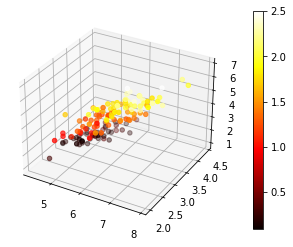

In [7]:
fig = plt.figure(1,figsize=(10,4))
ax = fig.add_subplot(111, projection='3d')


x=np.array(df['SepalLengthCm'])
y=np.array(df['SepalWidthCm'])
z = np.array(df['PetalLengthCm'])
c = np.array(df['PetalWidthCm'])

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

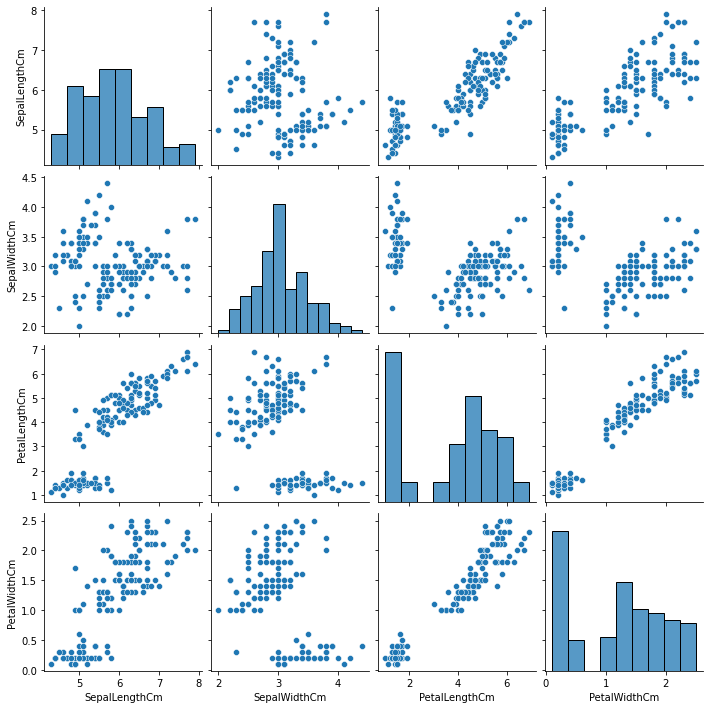

In [8]:
#pairwise relationship for the given dataset
import seaborn as sns
sns.pairplot(df)

# Outlier Detection and Removal


[] [2.  4.4 4.1 4.2] [] []


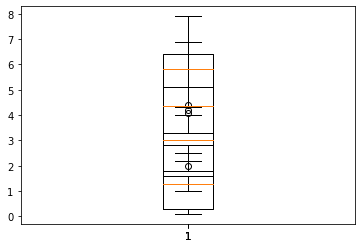

In [9]:
outliers1= plt.boxplot(df['SepalLengthCm'])["fliers"][0].get_data()[1]
outliers2= plt.boxplot(df['SepalWidthCm'])["fliers"][0].get_data()[1]
outliers3= plt.boxplot(df['PetalLengthCm'])["fliers"][0].get_data()[1]
outliers4= plt.boxplot(df['PetalWidthCm'])["fliers"][0].get_data()[1]
print(outliers1,outliers2,outliers3,outliers4)
i=df[(df['SepalWidthCm']==4.4)].index
df=df.drop(i)
i=df[(df['SepalWidthCm']==4.2)].index
df=df.drop(i)
i=df[(df['SepalWidthCm']==4.1)].index
df=df.drop(i)
i=df[(df['SepalWidthCm']==2.)].index
df=df.drop(i)

In [10]:
#assigning input(x) and output(y) value
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(df['Species'])

# Unsupervised Learning

# **Elbow Method**


In [11]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 **Elbow Curve**

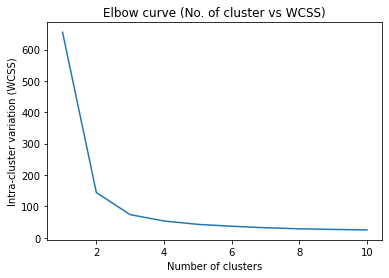

In [12]:
# Plotting the resulting curve 
plt.plot(range(1, 11), wcss)
plt.title('Elbow curve (No. of cluster vs WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('Intra-cluster variation (WCSS)') # Within cluster sum of squares
plt.show()

From the above graph we can consider that optimal number of cluster is 3

# Model Training 

In [13]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters centers

**1. Sepal length and sepal width**

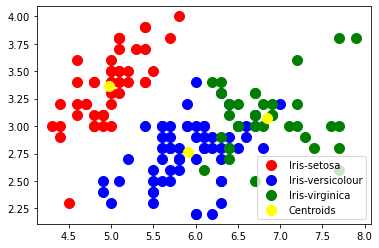

In [14]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**2. petal length and petal width**

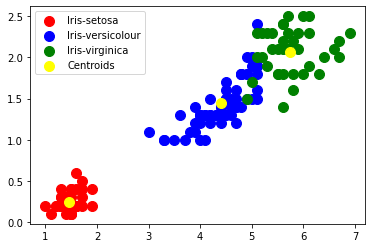

In [15]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Accuracy**

In [16]:
accuracy_score(y_kmeans,y, normalize=True)

0.8904109589041096

**Confusion Matrix**

<AxesSubplot:>

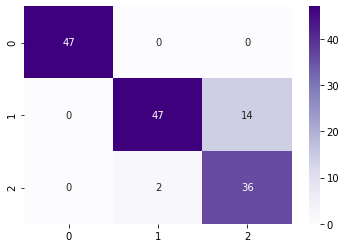

In [17]:
con=sm.confusion_matrix(y_kmeans,y)
sns.heatmap(con,annot=True,cmap='Purples')


# Supervised Learning

**train-test split**

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

### 1. Logistic Regression:

In [19]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
model_lr = GridSearchCV(LogisticRegression(),param_grid,cv = 5)
model_lr.fit(x_train, y_train)
y1_pred = model_lr.predict(x_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [20]:
print("Tuned Parameters for Logistic Regression : {}".format(model_lr.best_params_))
print("Classification Report:\n",classification_report(y_test, y1_pred))

Tuned Parameters for Logistic Regression : {'C': 31.622776601683793}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Accuracy**

In [21]:
print(round(model_lr.best_score_,2))

0.97


**Confusion Matrix**

<AxesSubplot:>

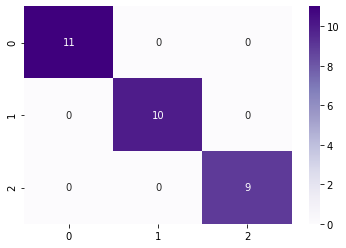

In [22]:
con = sm.confusion_matrix(y_test, y1_pred)
sns.heatmap(con,annot=True,cmap='Purples')

### 2. Support Vector Machine:

In [23]:
svc = SVC()
svc.fit(x_train, y_train)
y2_pred = svc.predict(x_test)
print("Classification Report:\n",classification_report(y_test, y2_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Accuracy**

In [24]:
accuracy_score(y2_pred,y_test, normalize=True)

1.0

**Confusion Matrix**

<AxesSubplot:>

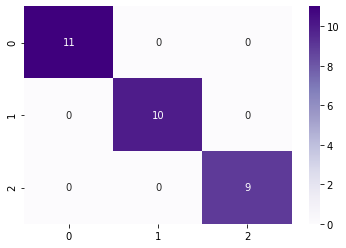

In [25]:
con=sm.confusion_matrix(y2_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

### 3. Decision Tree Classifier:

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y3_pred = dtc.predict(x_test)
print("Classification Report:\n",classification_report(y_test, y3_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



**Accuracy**

In [27]:
accuracy_score(y3_pred,y_test, normalize=True)

0.9333333333333333

**confusion matrix**

<AxesSubplot:>

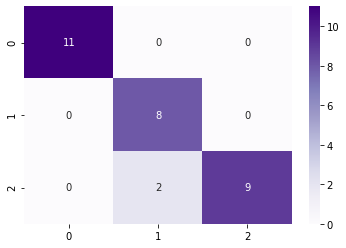

In [28]:
con=sm.confusion_matrix(y3_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

### 4. Random Forest Classifier:

In [29]:
start_rfc = time.time()
rfc = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rfc.fit(x_train, y_train)
end_rfc = time.time()
final_rfc = end_rfc - start_rfc
final_rfc = round(final_rfc,3)
y4_pred = rfc.predict(x_test)

In [30]:
print("Computation time                    : {}Sec".format(final_rfc))
print("Classification Report:\n",classification_report(y_test, y4_pred))

Computation time                    : 0.602Sec
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Accuracy**

In [31]:
accuracy_score(y4_pred,y_test, normalize=True)

1.0

**Confusion Matrix**

<AxesSubplot:>

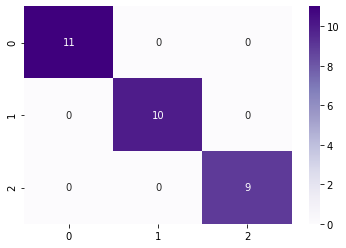

In [32]:
con=sm.confusion_matrix(y4_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

### 5. Naive Bayes Classifier

In [33]:
nbmod=GaussianNB()
nbmod.fit(x_train,y_train)
y5_pred = nbmod.predict(x_test)
print("Classification Report:\n",classification_report(y_test, y5_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



**Accuracy**

In [34]:
accuracy_score(y5_pred,y_test, normalize=True)

0.9666666666666667

**Confusion Matrix**

<AxesSubplot:>

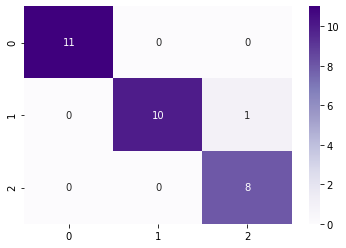

In [35]:
con=sm.confusion_matrix(y5_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

### 6. K-Nearest Neighbour

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y6_pred = knn.predict(x_test)
print("Classification Report:\n",classification_report(y_test, y6_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Accuracy**

In [37]:
accuracy_score(y6_pred,y_test, normalize=True)

1.0

**Confusion Matrix**

<AxesSubplot:>

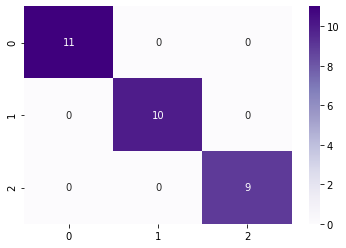

In [38]:
con=sm.confusion_matrix(y6_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

**Conclusions**

1.Petal length and petal width are highly co-related as shown by pairplot.

2. Supervised learning are having more accuracy as compared to unsupervised learning

In [ ]:
Thank You